# Lista 04 - Teste de Hipótese

In [18]:
#Defina a semente de geração de números aleatórios
#Não gerem mais números aleatórios do que o necessário, ou a correção dará errado
import numpy as np
import matplotlib.pyplot as plt

In [19]:
np.random.seed(2019104)

# Exercício 01:

Em uma determinada universidade, foi realizada uma entrevista em que se desejava coletar respostas de alunos de todas as grandes áreas de conhecimento. Dentre os 1000 entrevistados, cada área teve a seguinte quantidade de alunos:

* Exatas: 100
* Humanas: 600
* Biológicas: 300

No entanto, a qualidade da amostra foi questionada. Argumentou-se que a proporção de alunos de Humanas entrevistados foi muito maior que a proporção de alunos da mesma área na universidade como um todo. Na universidade, há cadastro de:

* 2000 alunos de Exatas
* 8000 alunos de Humanas
* 2500 alunos de Biológicas

A) Retorne uma lista de True ou False de acordo com as afirmativas abaixo:

    1: A respeito da hipótese nula, podemos realizar testes que nos permitam aceitá-la como verdadeira.
    2: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista não foi gerada de forma uniformemente aleatória".
    3: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista foi gerada de forma uniformemente aleatória".
    
Exemplo:

```python
def q1a():
    return [ False, False, False ]
```

In [20]:
def q1a():
    return [ True, False, True ]

B) Para comparar as distribuições, implemente a métrica de Total Variation Distance.

In [21]:
def tvd(p, q):
    result = 0
    tam = len(p)
    for i in range (tam): result += abs(p[i] - q[i])
    tvd = 0.5 * result
    return tvd

In [22]:
from numpy.testing import *
pop = np.array([0.15, 0.18, 0.12, 0.54, 0.01])
samp = np.array([0.26, 0.08, 0.08, 0.54, 0.04])
assert_equal( tvd(pop,samp), 0.14 )

C) Calcule o TVD da amostra utilizada na entrevista

__Dica:__ A Total Variation Distance é uma métrica de distância entre distribuições de probabilidade, não entre quantidades absolutas.

In [23]:
def q1c():
    s = [0.1, 0.6, 0.3]
    a = 8000 + 2000 + 2500
    pop = [2000/a, 8000/a, 2500/a]
    return tvd(pop, s)

q1c()

0.1

D) Implemente a função que simule uma amostra uniformemente aleatória, retornando uma lista de proporções para cada categoria (Exatas, Humanas, Biológicas).

Exemplo: 
```python
def gera_amostra(tamanho_amostra):
    return [0.6, 0.0, 0.4]
```
__Dica:__ crie uma lista para a população (indicando a área de conhecimento do estudante por 0,1 ou 2, por exemplo) e use a função ```numpy.random.shuffle``` para embaralhar os dados. Depois, pegue os primeiros elementos da lista para formar a amostra, e calcule as proporções a partir disso.

In [24]:
def gera_amostra(tamanho_amostra):
    
    # exatas = 0
    # humanas = 1
    # biológicas = 2
    
    pop_dict = {'exatas':0, 'humanas':0, 'biologicas':0}
    
    keys = list(pop_dict.keys())
    
    for i in range(tamanho_amostra):
        np.random.shuffle(keys)
        pop_dict[keys[0]] += 1
    
    return [pop_dict[keys[0]]/1000, pop_dict[keys[1]]/1000, pop_dict[keys[2]]/1000]

E) Gere 10000 amostras, e plote o gráfico de distribuição dos valores de TVD. Coloque no gráfico um ponto mostrando o TVD da amostra da entrevista.

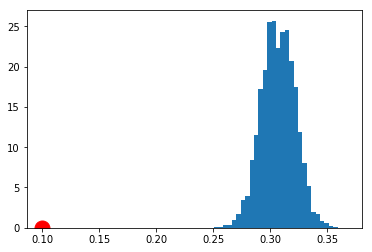

In [25]:
# número total de alunos: 12500
ams = []
q = [2000/12500, 8000/12500,2500/12500]
for i in range(10000): ams.append(tvd(gera_amostra(1000), q))

plt.hist(ams, density = True, bins = 30)
plt.plot([q1c()], [0], 'ro', ms=15)
        

F) Escreva uma função que retorne a partir de qual valor de TVD não estamos mais dentro do intervalo de 90% de confiança

In [26]:
def q1f():
    return np.percentile(ams, 90)

# Exercício 02:

Usando os dados do arquivo ```baby.csv```, vamos realizar um teste por permutação.

In [42]:
import pandas as pd

In [48]:
df = pd.read_csv('baby.csv')

# Convertendo para unidades não EUA
df['Birth Weight'] = 0.0283495 * df['Birth Weight']
df['Maternal Pregnancy Weight'] = 0.0283495 * df['Maternal Pregnancy Weight']
df['Maternal Height'] = 0.0254 * df['Maternal Height']

df.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,3.401940,284,27,1.5748,2.834950,False
1,3.203493,282,33,1.6256,3.827183,False
2,3.628736,279,28,1.6256,3.260193,True
3,3.061746,282,23,1.7018,3.543687,True
4,3.855532,286,25,1.5748,2.636503,False


A) Implemente uma função que retorne a diferença entre a média dos pesos dos bebês para as mães fumantes e a média para as mães não fumantes. Exemplo:

```python
def q2a(df):
    media_fumantes = 3.1
    media_nao_fumantes = 3.8
    return -0.7
```

In [49]:
def q2a(df):
    fumantes = df[df['Maternal Smoker'] == True]
    fumantes = fumantes['Birth Weight']
    media_fumantes = fumantes.mean()
    
    nao_fumantes = df[df['Maternal Smoker'] == False]
    nao_fumantes = nao_fumantes['Birth Weight']
    media_nao_fumantes = nao_fumantes.mean()
    
    return(media_fumantes - media_nao_fumantes)

B) Realize permutações com os rótulos (mães fumantes / não fumantes), de tamanhos ```[10,100,500,1000,5000]```. Plote gráficos mostrando a distribuição das diferenças entre as médias de peso dos bebês, conforme se aumenta a quantidade de permutações. Ou seja, um gráfico para 10 permutações, um para 100, e assim por diante.

Como exemplo, a imagem abaixo mostra o gráfico para 100 permutações.

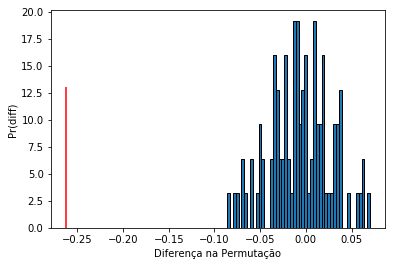

In [50]:
from IPython.display import Image
Image('100permutacoes.png')

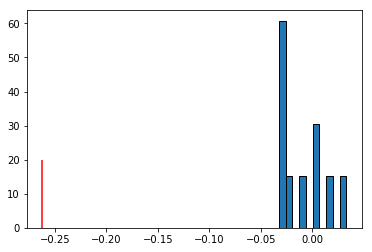

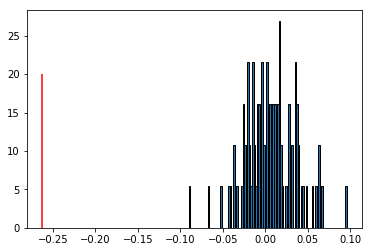

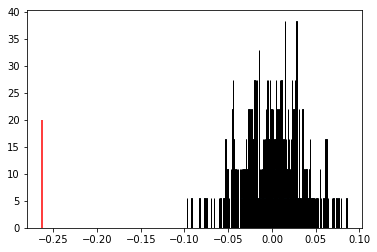

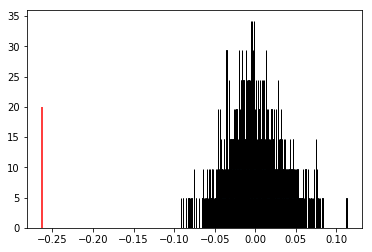

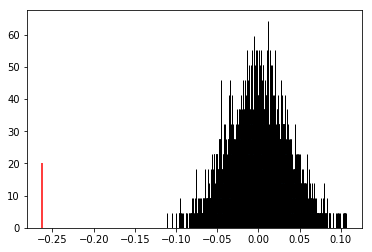

In [51]:
x = q2a(df)
def gera_permuta(df, tamanho):
    diffs = []
    valores = df['Maternal Smoker'].values
    for i in range(tamanho):
        np.random.shuffle(valores)
        diffs.append(q2a(df))
    return diffs

tamanhos = [10,100,500,1000,5000]
for i in range(5):
    dif = gera_permuta(df, tamanhos[i])
    plt.hist(dif, bins = tamanhos[i], density=True, edgecolor='k')
    plt.vlines(x, 0, 20, color='red')
    plt.show()

B) Escreva abaixo o que você observou com os gráficos.

Observei que a média se aproxima de zero à medida que aumentam-se as permutações. Além disso, a curva aproxima-se de uma normal. Com base nos dados, é possível perceber que fumar na gestação realmente influencia no peso dos bebês.